In [1]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
mist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mist.load_data() # Load data

In [5]:
print("x_train shape:",x_train.shape,"y_train_shape:", y_train.shape,"\nX_test shape:",x_test.shape,"y_test shape: ", y_test.shape)

x_train shape: (60000, 28, 28) y_train_shape: (60000,) 
X_test shape: (10000, 28, 28) y_test shape:  (10000,)


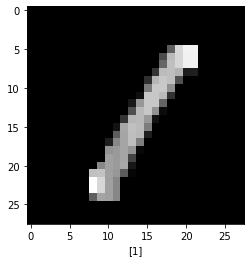

1/1 [==============================] - 0s 9ms/step


In [31]:
plt.imshow(x_train[3],cmap="gray")
plt.xlabel([y_train[3]])
plt.show()

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis =1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [8]:
model = tf.keras.models.Sequential()
#aading the input to maodel
model.add(tf.keras.layers.Flatten())
#Bulid the input and the hidden layers
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

#bulid the output layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


In [9]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [10]:
model_fitting = model.fit(x=x_train,y =y_train, batch_size=60,verbose=1,epochs=5,validation_split=.3)

Epoch 1/5


2022-07-16 07:47:54.989109: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


700/700 [==============================] - 1s 1ms/step - loss: 0.3610 - accuracy: 0.8988 - val_loss: 0.2047 - val_accuracy: 0.9381
Epoch 2/5
700/700 [==============================] - 1s 1ms/step - loss: 0.1476 - accuracy: 0.9553 - val_loss: 0.1380 - val_accuracy: 0.9594
Epoch 3/5
700/700 [==============================] - 1s 1ms/step - loss: 0.0992 - accuracy: 0.9691 - val_loss: 0.1346 - val_accuracy: 0.9602
Epoch 4/5
700/700 [==============================] - 1s 1ms/step - loss: 0.0718 - accuracy: 0.9782 - val_loss: 0.1139 - val_accuracy: 0.9673
Epoch 5/5
700/700 [==============================] - 1s 1ms/step - loss: 0.0552 - accuracy: 0.9826 - val_loss: 0.1178 - val_accuracy: 0.9674


In [11]:

test_loss,test_acc = model.evaluate(x=x_test,y= y_test)


print("\nTest Accuracu:", test_acc)
print("\nTest Loss:", test_loss)

313/313 [==============================] - 0s 568us/step - loss: 0.1094 - accuracy: 0.9668

Test Accuracu: 0.9667999744415283

Test Loss: 0.10936299711465836


In [12]:
predictions = model.predict([x_test])

313/313 [==============================] - 0s 493us/step


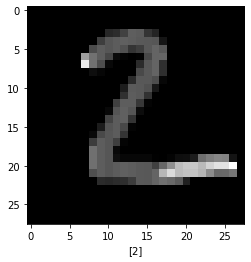

In [13]:
plt.imshow(x_test[1],cmap="gray")
plt.xlabel([y_test[1]])
plt.show()

In [45]:
print(np.argmax(predictions[1]))

In [46]:
def plot(i, predictions_array, true_label,img):
    predictions_array, true_label, img = predictions_array[i+10],true_label[i+10], img[i+10]
    plt.grid (True)
    plt.xticks([])
    plt.yticks([])
    #show the image of data 
    plt.imshow(img, cmap='gray')
    
    #condition for check if the prediction is right or wrong 
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color ='green'
    else:
        color = 'red'

    plt.xlabel ("Predicted Label: {} ,\nTrue: {}".format([predicted_label],
                    [true_label]),
                    color=color)



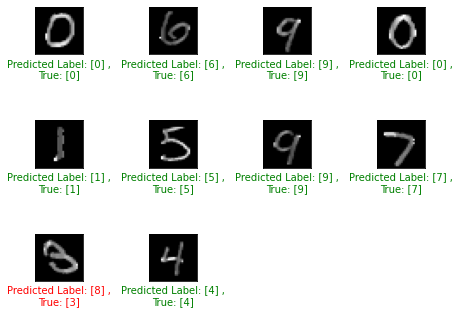

1/1 [==============================] - 0s 9ms/step


In [47]:
num_rows =4
num_cols =4
num_images = 10
plt.figure(figsize=(1*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot(i, predictions, y_test, x_test)
    
plt.show()

In [17]:
def predict_image(img):
    img_3d = img.reshape(-1,28,28)
    im_resize=tf.keras.utils.normalize(img_3d, axis =1)
    prediction = model.predict(im_resize)
    ans=np.argmax(prediction)
    return ans


In [18]:
test_loss,test_acc = model.evaluate(x=x_test,y= y_test)


print("\nTest Accuracy:", test_acc)


313/313 [==============================] - 0s 682us/step - loss: 0.1094 - accuracy: 0.9668

Test Accuracy: 0.9667999744415283


In [3]:
import gradio as gr

In [24]:
title = "Digit Recognition System"
description = """

A simple Machine learing Tool to recognize digits!!


"""

In [25]:
iface = gr.Interface(predict_image,inputs="sketchpad", outputs="label",title = title, description = description)

In [26]:
iface.launch()


Running on local URL:  http://127.0.0.1:7862/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x17b024ca0>, 'http://127.0.0.1:7862/', None)

1/1 [==============================] - 0s 10ms/step
